In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!ls ../data

demand_profile.csv listings.csv       reviews.csv        widget_data.txt


In [5]:
data = np.loadtxt(fname='../data/widget_data.txt', delimiter=',')

In [6]:
X = np.concatenate((np.ones((1000, 1)), data[:, :2]), axis=1)
y = data[:, 2]

In [8]:
beta = np.linalg.lstsq(X, y, rcond=None)[0]
beta

array([10.3982673 ,  0.84694798, -0.18010529])

In [9]:
beta_scaled = beta / np.std(X, axis=0, ddof=1)
beta_scaled

/var/folders/41/jhvt_zmd3nz3x5jsqblr221r0000gn/T/ipykernel_25687/1313630599.py:1: RuntimeWarning: divide by zero encountered in true_divide
  beta_scaled = beta / np.std(X, axis=0, ddof=1)


array([        inf,  0.36683981, -0.03609357])

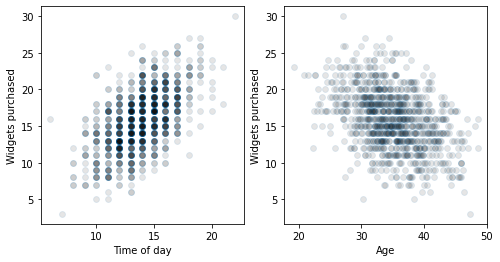

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(X[:, 1], y, 'o', markerfacecolor='k', alpha=0.1)
ax[0].set_xlabel('Time of day')
ax[0].set_ylabel('Widgets purchased')

ax[1].plot(X[:, 2], y, 'o', markerfacecolor='k', alpha=0.1)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Widgets purchased');

In [16]:
y_hat = X @ beta
rsq = 1 - np.sum((y_hat - y) ** 2) / np.sum((y - np.mean(y)) ** 2)
rsq

0.3663899451013618